In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
csv_location = 'input' # my local
# csv_location = '../input' # my local
print("csv files:\n" + check_output(["ls", csv_location]).decode("utf8")) # in kaggle use ../input

# Any results you write to the current directory are saved as output.

csv files:
gender_submission.csv
test.csv
train.csv



In [166]:
# Library imports
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
from sklearn.metrics import accuracy_score
%matplotlib inline

pd.set_option('display.max_columns', None ) # None will display ALL columns

In [167]:
# Reading in csv data
traindf_path = csv_location + '/' + 'train.csv'
testdf_path = csv_location + '/' + 'test.csv'

traindf = pd.read_csv(traindf_path)
testdf = pd.read_csv(testdf_path)
print("==Whole data set==")
traindf.info()
traindf.columns

# find out counts but leave test.csv alone
testdf.info()

# For submission use later
PassengerId = testdf['PassengerId']

==Whole data set==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [168]:
# check it out
traindf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### PassengerId

In [169]:
# drop PassengerId since no useful info
traindf.drop('PassengerId', axis=1,inplace=True)
testdf.drop('PassengerId', axis=1, inplace=True)

In [170]:
# column wise, how much null?
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Cabin

In [171]:
# Cabin has lots of missing values, rendered not useful
traindf.dropna(axis=1, thresh=len(traindf)/2., inplace=True)
traindf.head() # Cabin is dropped

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [172]:
# drop Cabin in testdf as well
testdf.drop('Cabin', axis = 1, inplace=True)
testdf.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Embarked

In [173]:
# Let's tackle Embarked null values
Counter(traindf['Embarked'].values)

# Find out the 2 rows 
traindf[traindf['Embarked'].isnull()]

Counter({nan: 2, 'Q': 77, 'S': 644, 'C': 168})

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [174]:
# Let's see if Ticket could clue us 
# Assume Ticket could indicate Embarked
# pull rows that has similar Ticket labels
traindf[traindf['Ticket'].str.match(r'^(1135\w{2})$')][['Ticket','Embarked']]

# Match 113xxx and use majority
from collections import Counter
Counter(traindf[traindf['Ticket'].str.match(r'^(113\w{3})$')]['Embarked'])

,Ticket,Embarked
54,113509,C
61,113572,NaN
166,113505,S
252,113514,S
351,113510,S
356,113505,S
377,113503,C
782,113501,S
829,113572,NaN


Counter({nan: 2, 'S': 41, 'C': 4})

The above show no definite Embarked for Ticket 1135XX <br>
Majority of Ticket matching 113xxx have Embarked as 'S'. Let's use 'S' to fill.

In [175]:
# Use 'S' for missing Embarked
traindf.fillna({'Embarked':'S'},inplace=True)
testdf.fillna({'Embarked':'S'}, inplace=True)

In [176]:
traindf.isnull().sum()
testdf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

### Fare

In [177]:
# Check out the row missing Fare
testdf[testdf['Fare'].isnull()]

# Use Pclass, SibSp, Parch to guess
fareGB = traindf.groupby(['Pclass','SibSp','Parch'])
aggFareGB = fareGB['Fare'].agg(['mean', 'max', 'median','std'])
aggFareGB.loc[(3,0,0), :]

#Most frequent fare in Pclass=3, SibSp=0, Parch=0
freqFareCounter = Counter(traindf[(traindf['Pclass']==3) & (traindf['SibSp']==0) & (traindf['Parch']==0)]['Fare'].values)

# the three most common fares
print(freqFareCounter.most_common(3))
# select stack index
# fareGB['Fare'].describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


mean       9.272052
max       56.495800
median     7.895800
std        7.420820
Name: (3, 0, 0), dtype: float64

[(8.0500000000000007, 43), (7.8958000000000004, 38), (7.75, 32)]


In [178]:
# Let's use the most common in its Pclass, SibSp and Parch: 8.05 
testdf.iloc[152, 7] = 8.05
testdf.iloc[152]

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Ticket                    3701
Fare                      8.05
Embarked                     S
Name: 152, dtype: object

In [179]:
traindf.isnull().sum()
testdf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
dtype: int64

In [180]:
traindf.head()
testdf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Age

In [181]:
# traindf[traindf['Age'].isnull()]
ageGB = traindf.groupby(['Pclass','SibSp','Parch', 'Sex'])

def mostCommonGB_age(s):
    r = Counter(s.values).most_common(1) # first of many most_commons
    return r[0][0]

aggCommonAgeGB_DF = ageGB['Age'].agg([mostCommonGB_age]) # square bracket get you dataframe
# aggCommonAgeGB_DF

aggMeanAgeGB_DF = ageGB['Age'].agg(['mean'])
# aggMeanAgeGB_DF

def getMostCommonAge(pclass, sibsp, parch, sex):
    # query the aggCommonAgeGB_DF
    try:
        r = aggCommonAgeGB_DF.loc[(pclass,sibsp,parch,sex),'mostCommonGB_age']
    except: 
        r = np.nan
        
#     print("r {}".format(r))
    return r

def getAvgAge(pclass, sibsp, parch, sex):
    try:
        r = aggMeanAgeGB_DF.loc[(pclass,sibsp,parch,sex),'mean']
    except:
        r = np.nan
        
#     print("r avg {}".format(r))
    return r

from decimal import Decimal

overallMeanAge = int(Decimal(traindf['Age'].mean()))
# overallMeanAge

import math
def fillBlankAge(r):
    pclass = r['Pclass']
    sibsp = r['SibSp']
    parch = r['Parch']
    sex = r['Sex']
    age = r['Age']
    if (math.isnan(age)):
        ga =  getMostCommonAge(pclass,sibsp,parch,sex)
#         print("getMostCommonAge pclass,sibsp,parch,sex = age{} {} {} {} {}".format(pclass,sibsp,parch,sex,ga))
        if (math.isnan(ga)):
            ga = getAvgAge(pclass,sibsp,parch,sex)
#             print("getAvgAge pclass,sibsp,parch,sex = age{} {} {} {} {}".format(pclass,sibsp,parch,sex,ga))
        if (math.isnan(ga)):
#             print("use overallMeanAge {}".format(overallMeanAge))
            ga = overallMeanAge
            
        return ga
   
#     print("original age{}".format(age))
    return age
    
traindf['Age']=traindf.apply(fillBlankAge, axis=1)

In [182]:
traindf.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


In [183]:
testdf['Age']=testdf.apply(fillBlankAge, axis=1) # use traindf numbers

### Name

In [184]:
# put them in fewer categories: 

import re

name_regex = r'.*(Mrs)|(Mr)|(Dr)|(Miss)|(Master)|(Col)|(Rev)|(Major)|(Ms)|(Capt)|(Countess)|(Mme).*'

def replace_title(a,regex=name_regex):
    import re
    r = re.search(regex, a, re.I)
    if r:
        if r.group(1): return "Mrs"
        if r.group(2): return "Mr"
        if r.group(3): return "Dr"
        if r.group(4): return "Miss"
        if r.group(5): return "Master"
        if r.group(6): return "Col"
        if r.group(7): return "Rev"
        if r.group(8): return "Major"
        if r.group(9): return "Ms"
        if r.group(10): return "Capt"
        if r.group(11): return "Countess"
        if r.group(12): return "Mme"
    else:
        return a

traindf['Title'] = traindf['Name'].apply(replace_title) # another arg name_regex is default in def

In [185]:
traindf['Title'].unique()
traindf[traindf['Name'].str.startswith('Sagess')]
traindf[traindf['Name'].str.startswith('Reuchlin')]

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Uruchurtu, Don. Manuel E',
       'Col', 'Dr', 'Rev', 'Mme', 'Major', 'Sagesser, Mlle. Emma', 'Capt',
       'Countess', 'Reuchlin, Jonkheer. John George'], dtype=object)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
641,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3,C,"Sagesser, Mlle. Emma"


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,"Reuchlin, Jonkheer. John George"


In [186]:
# replace thw two names manually
traindf.iloc[641,-1]='Miss'
traindf.iloc[822, -1]='Mr'

In [187]:
traindf['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Uruchurtu, Don. Manuel E',
       'Col', 'Dr', 'Rev', 'Mme', 'Major', 'Capt', 'Countess'], dtype=object)

In [188]:
testdf['Title'] = testdf['Name'].apply(replace_title) # another arg name_regex is default in def

In [189]:
testdf['Title'].unique()
testdf[testdf['Name'].str.startswith('Oliva y Ocana')]

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Dr', 'Col', 'Rev',
       'Oliva y Ocana, Dona. Fermina'], dtype=object)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,"Oliva y Ocana, Dona. Fermina"


In [190]:
# replace thw two names manually
testdf.iloc[414,-1]='Mrs'
testdf['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Dr', 'Col', 'Rev'], dtype=object)

# Prepare Features for modeling

In [191]:
# prepare feature for modeling
traindf.tail()
testdf.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.45,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Mr
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Mr


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
413,3,"Spector, Mr. Woolf",male,21.0,0,0,A.5. 3236,8.0500,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mrs
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,3,"Ware, Mr. Frederick",male,21.0,0,0,359309,8.0500,S,Mr
417,3,"Peter, Master. Michael J",male,18.0,1,1,2668,22.3583,C,Master


In [192]:
# drop Name
traindf.drop('Name', inplace=True, axis=1)
testdf.drop('Name', inplace=True, axis=1)

In [193]:
# drop Ticket
traindf.drop('Ticket', inplace=True, axis=1)
testdf.drop('Ticket', inplace=True, axis=1)

In [194]:
# onehot encode Sex, Pclass, Embarked, Title
# delay to when needed 

In [195]:
# age.ceil
traindf['Age'] = traindf['Age'].transform(lambda x: math.ceil(x))
testdf['Age'] = testdf['Age'].transform(lambda x: math.ceil(x))

# Some plot

### Pclass wise, what are survival like?

In [196]:
gby_survival = traindf.groupby(['Survived', 'Pclass'])

# which class survived best?
pclass_survived = gby_survival['Pclass'].agg(['count'])
pclass_survived

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

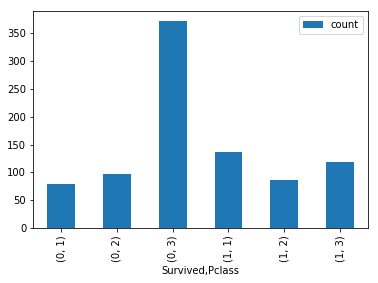

In [197]:
pclass_survived.plot(kind='bar') # quick plot

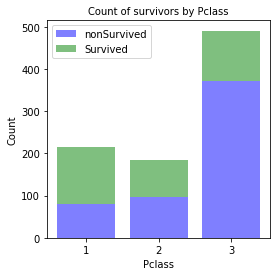

In [198]:
fg1, ax1 = plt.subplots(figsize=(4,4))
x1 = range(len(pclass_survived.loc[0, 'count']))
c1 = pclass_survived.loc[0,'count'].values
c2 = pclass_survived.loc[1,'count'].values

ax1.bar(x1, c1,label='nonSurvived', alpha=0.5, color='b')
ax1.bar(x1, c2, bottom=c1, label='Survived', alpha=0.5, color='g')

ax1.set_ylabel("Count")
ax1.set_xlabel("Pclass")
ax1.set_title("Count of survivors by Pclass",fontsize=10)
plt.xticks([0,1,2], ['1', '2', '3'] )
plt.legend(loc='upper left');

The above showed that Pclass 3 passengers mostly perished, Pclass 2 passengers have roughly equal chances of surviving, and Pclass 1 passengers have more survival than the unfortunate.  

### Gender wise, what are the survival like?

In [199]:
gby_survivalS = traindf.groupby(['Survived', 'Sex'])
gender_survived = gby_survivalS['Sex'].agg(['count'])
gender_survived

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

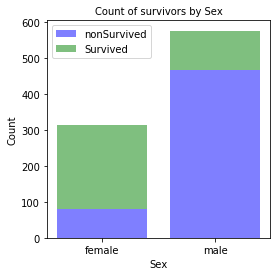

In [200]:
x3 = range(len(gender_survived.loc[0, 'count']))
c3 = gender_survived.loc[0,'count'].values
c4 = gender_survived.loc[1,'count'].values

fg3, ax3 = plt.subplots(figsize=(4,4))

ax3.bar(x3, c3,label='nonSurvived', alpha=0.5, color='b')
ax3.bar(x3, c4, bottom=c3, label='Survived', alpha=0.5, color='g')

ax3.set_ylabel("Count")
ax3.set_xlabel("Sex")
ax3.set_title("Count of survivors by Sex",fontsize=10)
plt.xticks([0,1], ['female', 'male'] )
plt.legend(loc='upper left');

Males largely perished, while females largely survived.

### Age wise?

In [201]:
ageNotSurvived = traindf[traindf['Survived']==0][['Survived','Age']]
ageNotSurvived.head()
ageNotSurvivedCount = ageNotSurvived.groupby('Age').agg(['count'])
ageNotSurvivedCount.head()
# ageNotSurvivedCount[('Survived','count')].values # these are counts
ageNotSurvivedCount.index.values # these are Age

ageSurvived = traindf[traindf['Survived']==1][['Survived','Age']]
# ageSurvived.head()
ageSurvivedCount = ageSurvived.groupby('Age').agg(['count'])
# ageSurvivedCount.head()

,Survived,Age
0,0,22
4,0,35
5,0,21
6,0,54
7,0,2


,Survived
,count
Age,
1,2
2,8
3,1
4,3
6,1


array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 70, 71, 74])

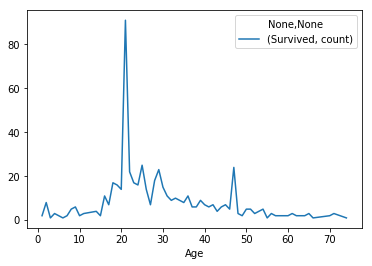

In [202]:
ageNotSurvivedCount.plot()

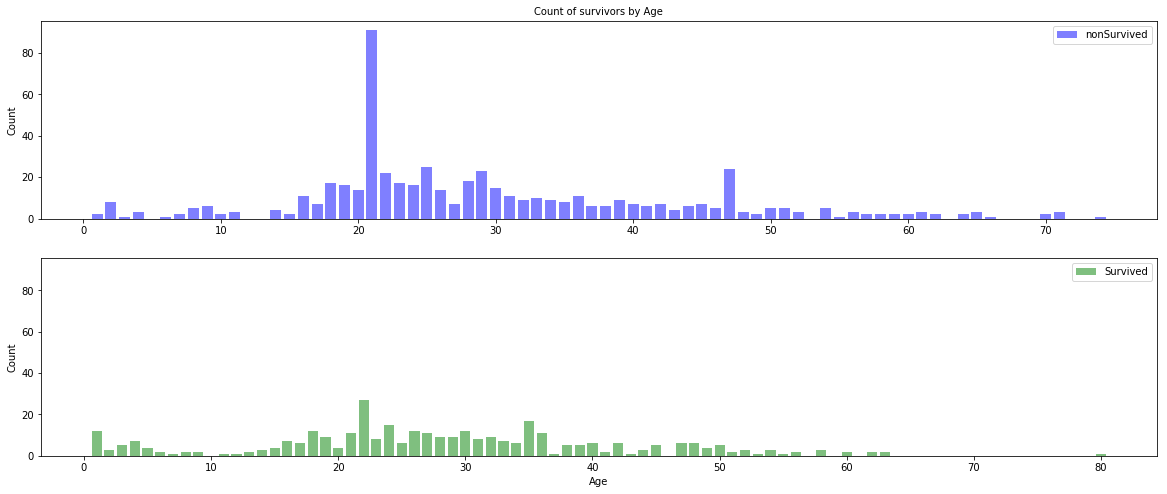

In [203]:
fg5, (ax5, ax6) = plt.subplots(nrows=2,ncols=1, sharex=False, sharey=True, figsize=(20,8))
x5 = ageNotSurvivedCount.index.values
x6 = ageSurvivedCount.index.values
c5 = ageNotSurvivedCount[('Survived','count')].values
c6 = ageSurvivedCount[('Survived','count')].values

ax5.bar(x5, c5, label='nonSurvived', alpha=0.5, color='b')
ax6.bar(x6, c6, label='Survived', alpha=0.5, color='g')

ax5.legend(loc=1)
ax6.legend(loc="upper right")
ax5.set_ylabel("Count")
ax6.set_ylabel("Count")
ax6.set_xlabel("Age")
ax5.set_title("Count of survivors by Age",fontsize=10);

### Convert feature to onehot encoded for modeling

In [204]:
traindf.tail(3)
traindf.info() # need convert Sex, Embarked, Title to numeric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
888,0,3,female,29,1,2,23.45,S,Miss
889,1,1,male,26,0,0,30.00,C,Mr
890,0,3,male,32,0,0,7.75,Q,Mr


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 62.7+ KB


In [205]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LEncoder = LabelEncoder()
OHencoder = OneHotEncoder() # may choose not to use 
traindf['Sex'] = LEncoder.fit_transform(traindf['Sex'])
traindf['Title'] = LEncoder.fit_transform(traindf['Title'])
traindf['Embarked'] = LEncoder.fit_transform(traindf['Embarked'])
traindf.head()

# for testdf
testdf['Sex'] = LEncoder.fit_transform(testdf['Sex'])
testdf['Title'] = LEncoder.fit_transform(testdf['Title'])
testdf['Embarked'] = LEncoder.fit_transform(testdf['Embarked'])
testdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,2,8
1,1,1,0,38,1,0,71.2833,0,9
2,1,3,0,26,0,0,7.9250,2,6
3,1,1,0,35,1,0,53.1000,2,9
4,0,3,1,35,0,0,8.0500,2,8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,35,0,0,7.8292,1,4
1,3,0,47,1,0,7.0000,2,5
2,2,1,62,0,0,9.6875,1,4
3,3,1,27,0,0,8.6625,2,4
4,3,0,22,1,1,12.2875,2,5


In [206]:
traindf.head(3)
OHencoder.fit(traindf)
OHencoder.n_values_
# OHencoder.transform

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,2,8
1,1,1,0,38,1,0,71.2833,0,9
2,1,3,0,26,0,0,7.9250,2,6


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

array([  2,   4,   2,  81,   9,   7, 513,   3,  13])

# models

In [207]:
# sepeate label from traindf
(X_train, y_train) = (traindf.drop('Survived', axis=1), traindf['Survived'])

# X_test (kaggle use, not for development)
X_test = testdf.copy()

### flat out predict no survivors 

In [208]:
# total survivors vs non-survivors
s = traindf['Survived']
Counter(s)
ss = traindf[['Survived']]
ss.mean()

Counter({0: 549, 1: 342})

Survived    0.383838
dtype: float64

There are 0.38 chance of survival, and 0.62 to perish.<br>
I could predict every passenger to not survived and I can get 0.62 accuracy.<br>
**My prediction performance can be benchmarked on 0.62.** It should do better to be meaningful. 

### predict randomly

In [209]:
# random model
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit

for astrategy in ['uniform', 'most_frequent','stratified']:
    randomModel = DummyClassifier(strategy=astrategy, random_state=7)

    # apply cross validation to make full use of data
    cvshuffle = ShuffleSplit(n_splits=5, test_size=0.20, train_size=None, random_state=7) # train_size will complement test_size when None
    scores = cross_val_score(randomModel, X_train, y_train, cv=cvshuffle)
    print("By {} strategy, mean scores are {}".format(astrategy, scores))

By uniform strategy, mean scores are [ 0.55865922  0.51955307  0.5698324   0.55307263  0.5027933 ]
By most_frequent strategy, mean scores are [ 0.61452514  0.58659218  0.60335196  0.62011173  0.62569832]
By stratified strategy, mean scores are [ 0.51396648  0.55307263  0.48044693  0.48603352  0.55865922]


**Random model could predict correctly at about half the time.<br>** Notice the most_frequency strategy actually confirms that flat out prediction of no survivors is around 0.6.   

### maybe apply scaler 

In [210]:
# check for outlier
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22,1,0,7.2500,2,8
1,1,0,38,1,0,71.2833,0,9
2,3,0,26,0,0,7.9250,2,6
3,1,0,35,1,0,53.1000,2,9
4,3,1,35,0,0,8.0500,2,8


In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
# scaler.fit
X_train['Title'] = scaler.fit_transform(X_train[['Title']])
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])
# for testdf:
X_test['Title'] = scaler.fit_transform(X_test[['Title']])
X_test['Fare'] = scaler.fit_transform(X_test[['Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,35,0,0,0.140334,1,4.212990
1,3,0,47,1,0,0.125471,2,5.266238
2,2,1,62,0,0,0.173642,1,4.212990
3,3,1,27,0,0,0.155270,2,4.212990
4,3,0,22,1,1,0.220246,2,5.266238


In [239]:
# Adjustment to training set
X_train.drop('Title',axis=1, inplace=True)
# X_train.drop('Fare',axis=1, inplace=True)
X_train.drop('Embarked',axis=1, inplace=True)

X_test.drop('Title',axis=1, inplace=True)
# X_test.drop('Fare',axis=1, inplace=True)
X_test.drop('Embarked',axis=1, inplace=True)

In [236]:
# X_train.drop('SibSp',axis=1, inplace=True)
# X_test.drop('SibSp',axis=1, inplace=True)
# X_train.head()
# X_test.head()

### DecisionTreeClassifier with GridSearchCV

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics.scorer import make_scorer

In [213]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [256]:
rf = RandomForestClassifier(criterion='gini', random_state=6)
dt = DecisionTreeClassifier(criterion='gini', random_state=7)
svm = SVC(random_state=8)
gb = GradientBoostingClassifier(random_state=9)

cvSplits = ShuffleSplit(n_splits=5, test_size=0.10, train_size=None, random_state=7)

RFparams = {'n_estimators':[110],'max_depth':range(5,10), 'max_features':[1]}  #'min_samples_split':[2,3,4,5,6],, 'min_samples_leaf':[1,2,4,3]
DTparams = {'criterion':['gini','entropy'],'max_depth':range(5,10),  'max_features':[2], 'splitter':['best', 'random']} #'min_samples_split':range(2,9), 'min_samples_leaf':range(2,9),
SVMparams = {}
GBparams = {'max_features':[1],'max_depth':range(5,10)} #'min_samples_split':range(3,9), 'min_samples_leaf':range(2,5),

scoring = make_scorer(performance_metric)
GS_selected=[]
participants = [dt]
# participants = [rf,dt,svm,gb]

for i, m in enumerate(participants):
    if isinstance(m, RandomForestClassifier):
        gs = GridSearchCV(estimator=m, cv=cvSplits, param_grid=RFparams, scoring=scoring) #default mean score #, scoring=scoring)
    if isinstance(m, DecisionTreeClassifier):
        gs = GridSearchCV(estimator=m, cv=cvSplits, param_grid=DTparams, scoring=scoring) # 
    if isinstance(m, SVC):
        gs = GridSearchCV(estimator=m, cv=cvSplits, param_grid={'random_state':[8]}, scoring=scoring) 
    if isinstance(m, GradientBoostingClassifier):
        gs = GridSearchCV(estimator=m, cv=cvSplits, param_grid=GBparams, scoring=scoring) 
        
    GS_selected.append(gs)
    
#     GS_selected[i]
# GS_selected # all set up revealed

# run a decision tree fit with all params 
if rf in participants:
    rf_clf = GS_selected[0].fit(X_train, y_train)
    rf_clf.best_estimator_
if dt in participants:
    dt_clf = GS_selected[0].fit(X_train, y_train)
    dt_clf.best_estimator_
if svm in participants:
    svm_clf = GS_selected[2].fit(X_train, y_train)
    svm_clf.best_estimator_
if gb in participants:
    gb_clf = GS_selected[3].fit(X_train, y_train)
    gb_clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best')

### Let's predict

In [257]:
# predict and write
prediction = dt_clf.predict(X_test)

# create dataframe submission
submission = pd.DataFrame(index=PassengerId)
submission['Survived'] = prediction

In [258]:
# save to submission file
version = 22
submission['Survived'].unique()
submission.head()
submission.to_csv('submittitanictokaggle'+ str(version)+ '.csv')

array([0, 1])

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
